# Climate Data from GridMET

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

import pygridmet as gridmet
from pygridmet import GridMET
from pynhd import NLDI

The Daymet database provides climatology data at 1-km resolution. First, we use [PyNHD](https://github.com/hyriver/pynhd) to get the contributing watershed geometry of a NWIS station with the ID of `USGS-01318500`:

In [2]:
geometry = NLDI().get_basins("01318500").geometry[0]

[PyGridMET](https://github.com/hyriver/pygridmet) allows us to get the data for a single pixel or for a region as gridded data. The function to get single pixel is called `pygridmet.get_bycoords` and for gridded data is called `pygridmet.get_bygeom`. The arguments of these functions are identical except the first argument where the latter
should be polygon and the former should be a coordinate (a tuple of length two as in `(x, y)`).

The input geometry or coordinate can be in any valid CRS (defaults to EPSG:4326). The `date`
argument can be either a tuple of length two like `(start_str, end_str)` or a list of years
like `[2000, 2005]`.

We can get a dataframe of available variables and their info by calling `GridMET().gridmet_table`.

In [3]:
GridMET().gridmet_table

,variable,abbr,long_name,units
0,Precipitation,pr,precipitation_amount,mm
1,Maximum Relative Humidity,rmax,daily_maximum_relative_humidity,%
2,Minimum Relative Humidity,rmin,daily_minimum_relative_humidity,%
3,Specific Humidity,sph,daily_mean_specific_humidity,kg/kg
4,Surface Radiation,srad,daily_mean_shortwave_radiation_at_surface,W/m2
5,Wind Direction,th,daily_mean_wind_direction,Degrees clockwise from north
6,Minimum Air Temperature,tmmn,daily_minimum_temperature,K
7,Maximum Air Temperature,tmmx,daily_maximum_temperature,K
8,Wind Speed,vs,daily_mean_wind_speed,m/s
9,Burning Index,bi,daily_mean_burning_index_g,-


In [4]:
dates = ("2000-01-01", "2000-01-06")
daily = gridmet.get_bygeom(geometry, dates, variables=["pr", "pet"])

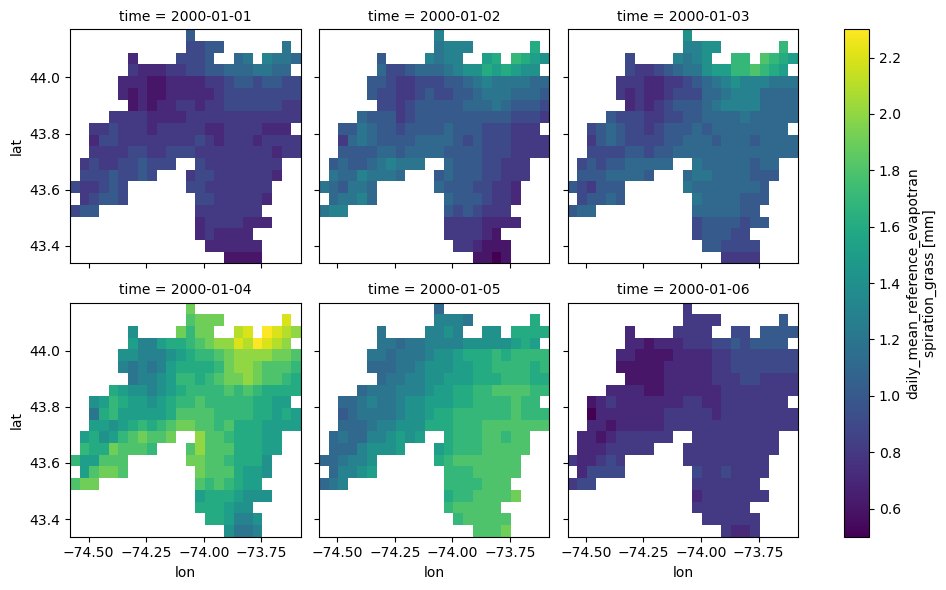

In [5]:
ax = daily.where(daily.pet > 0).pet.plot(x="lon", y="lat", row="time", col_wrap=3)
ax.fig.savefig(Path("_static", "gridmet_grid.png"), facecolor="w", bbox_inches="tight")

Note that the default CRS is EPSG:4326. If the input geometry (or coordinate) is in a different CRS we can pass it to the function. The gridded data are automatically masked to the input geometry. Now, Let's get the data for a coordinate in EPSG:3542 CRS.

In [6]:
coords = (-1431147.7928, 318483.4618)
crs = 3542
dates = ("2000-01-01", "2006-12-31")
clm = gridmet.get_bycoords(coords, dates, variables=["pr", "tmmn"], crs=crs)

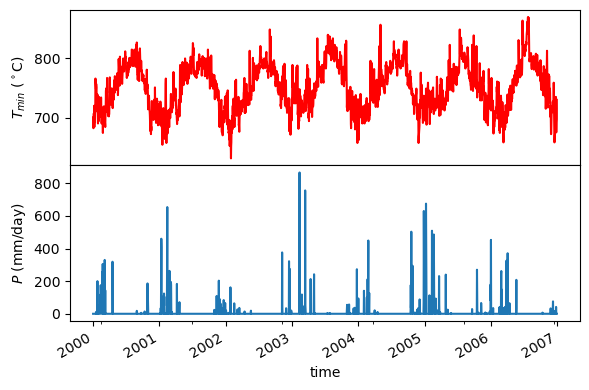

In [7]:
fig = plt.figure(figsize=(6, 4), facecolor="w")

gs = fig.add_gridspec(1, 2)
axes = gs[:].subgridspec(2, 1, hspace=0).subplots(sharex=True)
clm["tmmn (K)"].plot(ax=axes[0], color="r")
axes[0].set_ylabel(r"$T_{min}$ ($^\circ$C)")
axes[0].xaxis.set_ticks_position("none")
clm["pr (mm)"].plot(ax=axes[1])
axes[1].set_ylabel("$P$ (mm/day)")

plt.tight_layout()
fig.savefig("_static/gridmet_loc.png", facecolor="w", bbox_inches="tight")